In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import math
import os
%matplotlib inline

In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Clean
null_cols = df.isnull().sum()
null_cols

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# Clean Publisher and Developer Columns. Remove Developer Column
df['Publisher'] = np.where(df['Publisher'].isna()==True, df['Developer'], df['Publisher'])
df.drop(['Developer'], axis=1, inplace=True)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.rename(columns={'Year_of_Release':'Year', 'Publisher':'Developer'})

In [8]:
df = df[df['Year'].isna()==False]
df['Year'] = df['Year'].astype(int)

df = df[df['Name'].isna()==False]

In [9]:
df.shape

(16448, 15)

In [10]:
df.head()

,Name,Platform,Year,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [11]:
null_cols = df.isnull().sum()
null_cols

Name               0
Platform           0
Year               0
Genre              0
Developer         29
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8465
Critic_Count    8465
User_Score      6608
User_Count      8985
Rating          6679
dtype: int64

In [12]:
df.loc[df['Name'] == 'Shrek / Shrek 2 2-in-1 Gameboy Advance Video', 'Publisher'] = "Activision"
df.loc[df['Name'] == "Bentley's Hackpack", 'Publisher'] = "Sony Computer Entertainment"
df = df[df['Developer'].isna()==False]

df.loc[df['User_Score'] == "tbd", 'User_Score'] = None
df['User_Score'] = df['User_Score'].astype(float)
df['User_Score'] = df['User_Score']*10

In [13]:
df.drop(['Publisher'], axis=1, inplace=True)

In [14]:
null_cols = df.isnull().sum()
null_cols

Name               0
Platform           0
Year               0
Genre              0
Developer          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8436
Critic_Count    8436
User_Score      8956
User_Count      8956
Rating          6650
dtype: int64

### Data set with No NaN values - only with games with full score/rating information

In [15]:
df_s = df.copy().dropna()

df_s.reset_index(inplace=True)
df_s = df_s.rename(columns={'index':'rank'})
df_s.head()

,rank,Name,Platform,Year,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,E
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,E
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,E
3,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,E
4,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,E


In [16]:
df_s.describe()

,rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000
mean,6626.597275,2007.437299,0.394435,0.236069,0.064149,0.082665,0.777499,70.268679,28.931146,71.850132,174.748022
std,4516.598425,4.211160,0.967323,0.687282,0.287550,0.269853,1.963313,13.870417,19.222757,14.407272,587.389332
min,0.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,5.000000,4.000000
25%,2716.500000,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,65.000000,11.000000
50%,5980.500000,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,75.000000,27.000000
75%,10100.750000,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,82.000000,89.000000
max,16706.000000,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,96.000000,10665.000000


In [17]:
df_s.shape

(6826, 16)

### Add dummies for Categorical Variables (One Hot Encoding)

In [18]:
#1 - Genre

df_s['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         268
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

In [28]:
genre_dum = pd.get_dummies(df_s['Genre'],drop_first=True,prefix='g') 

In [30]:
genre_dum.head()

,g_Adventure,g_Fighting,g_Misc,g_Platform,g_Puzzle,g_Racing,g_Role-Playing,g_Shooter,g_Simulation,g_Sports,g_Strategy
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [54]:
#Add dummy set#1 - Genre
df_s = pd.concat([df_s,genre_dum], axis=1)

In [55]:
#2 - Developer

dev_count = df_s['Developer'].value_counts()
dev_count

Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

In [56]:
#Developer must produce minimum 25 games, otherwise it will be assigned to "Other"
df_s['Developer'] = np.where(dev_count[df_s['Developer']]>25, df_s['Developer'], 'Other')

In [57]:
dev_dum = pd.get_dummies(df_s['Developer'],drop_first=False,prefix='d') 
dev_dum.head()

,d_505 Games,d_Acclaim Entertainment,d_Activision,d_Atari,d_Bethesda Softworks,d_Capcom,d_Codemasters,d_D3Publisher,d_Deep Silver,d_Disney Interactive Studios,...,d_Rising Star Games,d_Sega,d_Sony Computer Entertainment,d_Square Enix,d_THQ,d_Take-Two Interactive,d_Tecmo Koei,d_Ubisoft,d_Vivendi Games,d_Warner Bros. Interactive Entertainment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#Add dummy set#2 - Developer
df_s = pd.concat([df_s,dev_dum], axis=1)

In [59]:
#3 - Platform

df_s['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       652
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

In [60]:
pla_dum = pd.get_dummies(df_s['Platform'],drop_first=True,prefix='p') 
pla_dum.head()

,p_DC,p_DS,p_GBA,p_GC,p_PC,p_PS,p_PS2,p_PS3,p_PS4,p_PSP,p_PSV,p_Wii,p_WiiU,p_X360,p_XB,p_XOne
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [61]:
#Add dummy set#3 - Platform
df_s = pd.concat([df_s,pla_dum], axis=1)

In [62]:
#4 - ESRB Rating

df_s['Rating'].value_counts()

T       2378
E       2082
M       1433
E10+     930
RP         1
K-A        1
AO         1
Name: Rating, dtype: int64

In [63]:
#Additional Cleaning Required.

df_s['Rating'] = df_s['Rating'].replace('E10+','E')
df_s['Rating'] = df_s['Rating'].replace('K-A','E')
df_s['Rating'] = df_s['Rating'].replace('AO','M')
df_s['Rating'] = df_s['Rating'].replace('RP','E')
df_s['Rating'] = df_s['Rating'].replace('EC','E')

In [64]:
df_s['Rating'].value_counts()

E    3014
T    2378
M    1434
Name: Rating, dtype: int64

In [65]:
rat_dum = pd.get_dummies(df_s['Rating'],drop_first=True,prefix='r') 
rat_dum.head()

,r_M,r_T
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [66]:
#Add dummy set#4 - Rating
df_s = pd.concat([df_s,rat_dum], axis=1)

In [67]:
df_s.shape

(6826, 78)

In [68]:
df_s.head()

,rank,Name,Platform,Year,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,p_PS4,p_PSP,p_PSV,p_Wii,p_WiiU,p_X360,p_XB,p_XOne,r_M,r_T
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,...,0,0,0,1,0,0,0,0,0,0
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,...,0,0,0,1,0,0,0,0,0,0
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,...,0,0,0,1,0,0,0,0,0,0
3,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,...,0,0,0,0,0,0,0,0,0,0
4,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,...,0,0,0,1,0,0,0,0,0,0


In [112]:
# Remove Categorical Columns
df_m = df_s.copy()
df_m.drop(['rank','Name','Platform','Genre','Developer','Rating'], axis=1, inplace=True)

# VISUALIZE


In [73]:
sns.set()

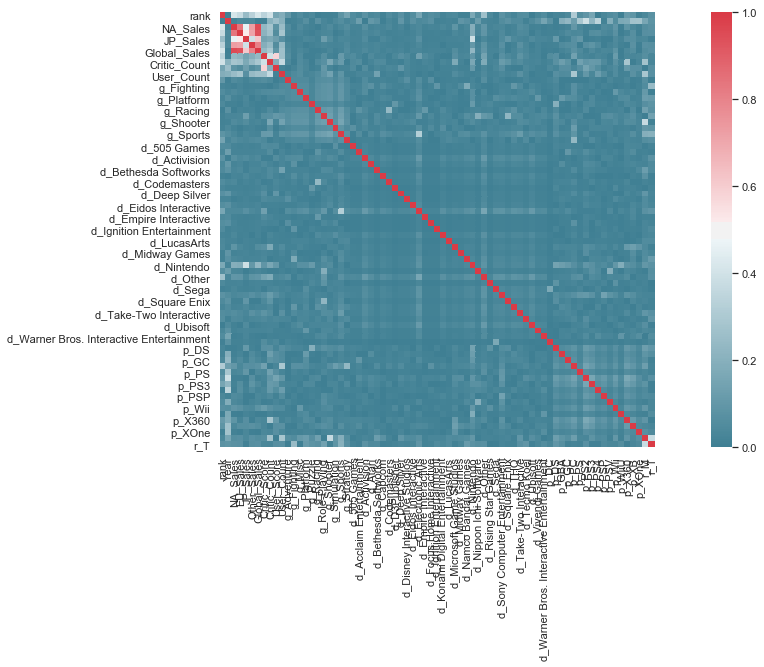

In [74]:
df1c=abs(df_s.corr())

f,ax=plt.subplots(figsize=(20,8))

sns.heatmap(df1c,cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)
plt.show()

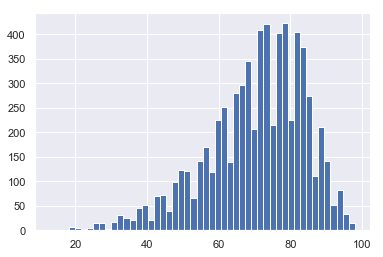

In [79]:
df_s['Critic_Score'].hist(bins=50)
plt.show()

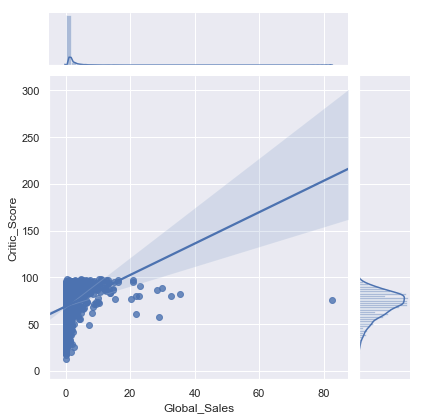

In [77]:
sns.jointplot(y='Critic_Score',x='Global_Sales',data=df_s,kind='reg')
plt.show()

In [113]:
'''
We clearly have outliers in Global Sales that we should remove to strengthen our model.
'''

# USE IQR METHOD
Q25 = df_m['Global_Sales'].quantile(0.25)
Q75 = df_m['Global_Sales'].quantile(0.75)
IQR = Q75-Q25

MaxQ = Q75+1.5*IQR
MinQ = max(Q25-1.5*IQR,0.05)  #Set a minimum of 50,000 copies sold.

print(MinQ, MaxQ, Q25, Q75)

df_m = df_m[(df_m['Global_Sales'] > MinQ) & (df_m['Global_Sales'] < MaxQ)]

0.05 1.71 0.11 0.75


In [114]:
df_m.shape

(5323, 72)

<Figure size 1728x864 with 0 Axes>

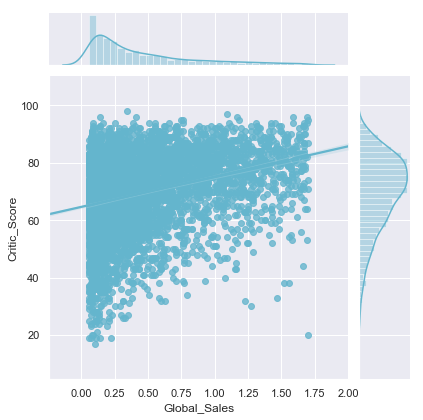

In [115]:
plt.figure(figsize=(24,12))
sns.jointplot(y='Critic_Score',x='Global_Sales',data=df_m,kind='reg', color='c')
plt.show()

<Figure size 1728x864 with 0 Axes>

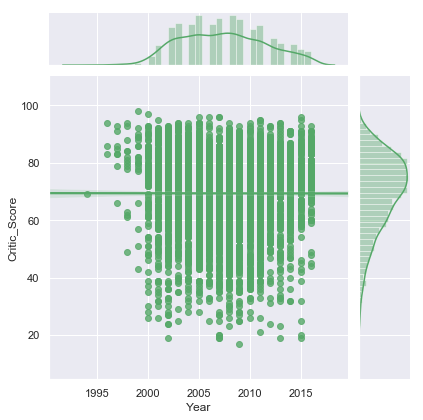

In [116]:
plt.figure(figsize=(24,12))
sns.jointplot(y='Critic_Score',x='Year',data=df_m,kind='reg', color='g')
plt.show()

In [117]:
# USE IQR METHOD for YEAR
Q25y = df_m['Year'].quantile(0.25)
Q75y = df_m['Year'].quantile(0.75)
IQRy = Q75y-Q25y

MaxQy = Q75y+1.5*IQRy
MinQy = (Q25y-1.5*IQRy)  #Set a minimum of 50,000 copies sold.

print(MinQy, MaxQy, Q25y, Q75y)

df_m = df_m[(df_m['Year'] > MinQy) & (df_m['Year'] < MaxQy)]

1995.0 2019.0 2004.0 2010.0


<Figure size 1080x1080 with 0 Axes>

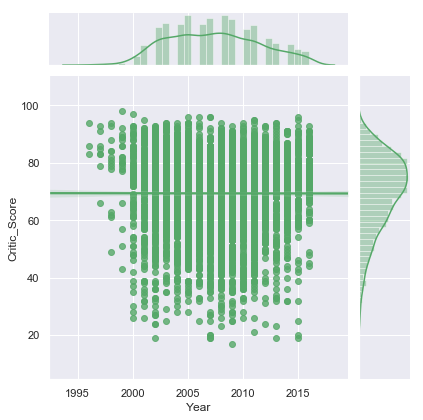

In [118]:
plt.figure(figsize=(15,15))
sns.jointplot(y='Critic_Score',x='Year',data=df_m,kind='reg', color='g')
plt.show()

## Multicollinearity Test

In [119]:
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    vif_array = np.array([])
    tolerance_array = np.array([])
    
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"
        
        r_squared = smf.ols(formula, data=data).fit().rsquared   #rsquared is the fitting of the model.
        
        vif = 1/(1-r_squared)
        vif_array = np.append(vif_array,vif).round(2)
        
        tolerance = 1-r_squared
        tolerance_array = np.append(tolerance_array,tolerance).round(2)
    
    df_vif = pd.DataFrame({'VIF':vif_array,'Tolerance':tolerance_array},index=exogs)
    
    return df_vif

In [120]:
df_m.rename(columns=lambda x: x.replace(' ','_'), inplace=True)
df_m.rename(columns=lambda x: x.replace('-',''), inplace=True)
df_m.rename(columns=lambda x: x.replace('.',''), inplace=True)

In [121]:
df_m.shape

(5322, 72)

In [122]:
get_vif(exogs=df_m.columns, data=df_m)

C:\Users\Tom N\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


,VIF,Tolerance
Year,4.97,0.20
NA_Sales,1594.52,0.00
EU_Sales,750.99,0.00
JP_Sales,289.19,0.00
Other_Sales,112.76,0.01
Global_Sales,4398.75,0.00
Critic_Score,2.18,0.46
Critic_Count,1.94,0.52
User_Score,1.88,0.53
User_Count,1.63,0.61


In [123]:
#From reviewing, we have examples where columns are strongly correlated. Lets drop some and 
#ensure that each variable has a VIF < 10.

In [131]:
#df_m.drop('NA_Sales',axis=1, inplace=True)
#df_m.drop('d_505_Games',axis=1, inplace=True)
#df_m.drop('d_Other',axis=1, inplace=True)
df_m.drop('p_PS2',axis=1, inplace=True)

In [133]:
df_VIF = get_vif(exogs=df_m.columns, data=df_m)
df_VIF 

,VIF,Tolerance
Year,3.62,0.28
EU_Sales,3.05,0.33
JP_Sales,1.69,0.59
Other_Sales,2.53,0.40
Global_Sales,4.77,0.21
Critic_Score,2.17,0.46
Critic_Count,1.93,0.52
User_Score,1.88,0.53
User_Count,1.63,0.62
g_Adventure,1.16,0.86


In [136]:
df_VIF['VIF'].max()

4.77

# Build the OLS Regression Model

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_m.drop('Critic_Score',axis=1), 
                                                    df_m['Critic_Score'], test_size=0.30)


In [138]:
X_new = pd.concat([X_train,y_train],axis=1)
X_new.sort_index(inplace=True)
X_new.columns

Index(['Year', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Count', 'User_Score', 'User_Count', 'g_Adventure', 'g_Fighting',
       'g_Misc', 'g_Platform', 'g_Puzzle', 'g_Racing', 'g_RolePlaying',
       'g_Shooter', 'g_Simulation', 'g_Sports', 'g_Strategy',
       'd_Acclaim_Entertainment', 'd_Activision', 'd_Atari',
       'd_Bethesda_Softworks', 'd_Capcom', 'd_Codemasters', 'd_D3Publisher',
       'd_Deep_Silver', 'd_Disney_Interactive_Studios', 'd_Eidos_Interactive',
       'd_Electronic_Arts', 'd_Empire_Interactive', 'd_Focus_Home_Interactive',
       'd_Ignition_Entertainment', 'd_Konami_Digital_Entertainment',
       'd_LucasArts', 'd_Microsoft_Game_Studios', 'd_Midway_Games',
       'd_Namco_Bandai_Games', 'd_Nintendo', 'd_Nippon_Ichi_Software',
       'd_Rising_Star_Games', 'd_Sega', 'd_Sony_Computer_Entertainment',
       'd_Square_Enix', 'd_THQ', 'd_TakeTwo_Interactive', 'd_Tecmo_Koei',
       'd_Ubisoft', 'd_Vivendi_Games',
       'd_Warner_Bros_Int

In [157]:
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #For standardizing columns 
    return (x-x.mean())/x.std()

In [162]:
cols_stand = ['Year','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Count','User_Score','User_Count']

for i in cols_stand:
    X_new[i] = standardize(X_new[i])


##### First Pass for OLS regression

In [163]:
Xs = X_new[[i for i in X_new.columns if i!= 'Critic_Score']]
results = smf.ols(f"standardize(Critic_Score) ~ {' + '.join(Xs.columns)}" , data=X_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     standardize(Critic_Score)   R-squared:                       0.553
Model:                                   OLS   Adj. R-squared:                  0.545
Method:                        Least Squares   F-statistic:                     67.45
Date:                       Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                               17:01:17   Log-Likelihood:                -3786.5
No. Observations:                       3725   AIC:                             7709.
Df Residuals:                           3657   BIC:                             8132.
Df Model:                                 67                                         
Covariance Type:                   nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -0.3861      0.052     -7.397      0.000      -0.488      -0.284
Year                                        0.1350      0.021      6.326      0.000       0.093       0.177
EU_Sales                                   -0.0242      0.020     -1.240      0.215      -0.062       0.014
JP_Sales                                   -0.0167      0.015     -1.148      0.251      -0.045       0.012
Other_Sales                                -0.0163      0.018     -0.934      0.351      -0.051       0.018
Global_Sales                                0.1860      0.024      7.765      0.000       0.139       0.233
Critic_Count                                0.1896      0.015     12.416      0.000       0.160       0.219
User_Score                                  0.5472      0.012     44.219      0.000       0.523       0.571
User_Count                                  0.0394      0.014      2.751      0.006       0.011       0.068
g_Adventure                                 0.0545      0.063      0.864      0.388      -0.069       0.178
g_Fighting                                  0.2304      0.055      4.175      0.000       0.122       0.339
g_Misc                                      0.2741      0.056      4.935      0.000       0.165       0.383
g_Platform                                  0.1411      0.055      2.577      0.010       0.034       0.248
g_Puzzle                                    0.5203      0.097      5.364      0.000       0.330       0.710
g_Racing                                    0.1898      0.050      3.833      0.000       0.093       0.287
g_RolePlaying                               0.2073      0.046      4.521      0.000       0.117       0.297
g_Shooter                                   0.1146      0.041      2.766      0.006       0.033       0.196
g_Simulation                                0.1866      0.062      2.998      0.003       0.065       0.309
g_Sports                                    0.5300      0.045     11.827      0.000       0.442       0.618
g_Strategy                                  0.3091      0.068      4.534      0.000       0.175       0.443
d_Acclaim_Entertainment                    -0.0119      0.105     -0.113      0.910      -0.218       0.195
d_Activision                                0.1452      0.054      2.713      0.007       0.040       0.250
d_Atari                                    -0.0172      0.076     -0.225      0.822      -0.167       0.132
d_Bethesda_Softworks                        0.1290      0.144      0.899      0.369      -0.152       0.410
d_Capcom                                    0.2904      0.072      4.013      0.000       

###### Remove columns with P-value > 0.05, one at a time until none exist

In [224]:
#X_new.drop('d_Nippon_Ichi_Software',axis=1, inplace=True)
#X_new.drop('Other_Sales',axis=1, inplace=True)
#X_new.drop('JP_Sales',axis=1, inplace=True)
#X_new.drop('EU_Sales',axis=1, inplace=True)
#X_new.drop('g_Adventure',axis=1, inplace=True)
#X_new.drop('d_Disney_Interactive_Studios',axis=1, inplace=True)
#X_new.drop('d_Midway_Games',axis=1, inplace=True)
#X_new.drop('d_Microsoft_Game_Studios',axis=1, inplace=True)
#X_new.drop('d_D3Publisher',axis=1, inplace=True)
#X_new.drop('d_Sega',axis=1, inplace=True)
#X_new.drop('d_Rising_Star_Games',axis=1, inplace=True)
#X_new.drop('d_Tecmo_Koei',axis=1, inplace=True)
#X_new.drop('d_Atari',axis=1, inplace=True)
#X_new.drop('d_Acclaim_Entertainment',axis=1, inplace=True)
#X_new.drop('d_Empire_Interactive',axis=1, inplace=True)
#X_new.drop('p_WiiU',axis=1, inplace=True)
#X_new.drop('d_Bethesda_Softworks',axis=1, inplace=True)
#X_new.drop('p_PS4',axis=1, inplace=True)
#X_new.drop('p_PSV',axis=1, inplace=True)
#X_new.drop('d_Vivendi_Games',axis=1, inplace=True)
#X_new.drop('p_DS',axis=1, inplace=True)
#X_new.drop('d_Nintendo',axis=1, inplace=True)
#X_new.drop('p_PSP',axis=1, inplace=True)
#X_new.drop('d_Warner_Bros_Interactive_Entertainment',axis=1, inplace=True)
#X_new.drop('d_Ignition_Entertainment',axis=1, inplace=True)
#X_new.drop('d_Namco_Bandai_Games',axis=1, inplace=True)
#X_new.drop('d_Deep_Silver',axis=1, inplace=True)
#X_new.drop('d_Focus_Home_Interactive',axis=1, inplace=True)
X_new.drop('p_PS3',axis=1, inplace=True)

In [225]:
Xs = X_new[[i for i in X_new.columns if i!= 'Critic_Score']]
results = smf.ols(f"standardize(Critic_Score) ~ {' + '.join(Xs.columns)}" , data=X_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     standardize(Critic_Score)   R-squared:                       0.548
Model:                                   OLS   Adj. R-squared:                  0.544
Method:                        Least Squares   F-statistic:                     117.8
Date:                       Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                               17:20:45   Log-Likelihood:                -3804.2
No. Observations:                       3725   AIC:                             7686.
Df Residuals:                           3686   BIC:                             7929.
Df Model:                                 38                                         
Covariance Type:                   nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.3310      0.034     -9.822      0.000      -0.397      -0.265
Year                               0.1506      0.015      9.944      0.000       0.121       0.180
Global_Sales                       0.1512      0.013     12.071      0.000       0.127       0.176
Critic_Count                       0.1904      0.015     13.096      0.000       0.162       0.219
User_Score                         0.5462      0.012     44.905      0.000       0.522       0.570
User_Count                         0.0366      0.014      2.603      0.009       0.009       0.064
g_Fighting                         0.2281      0.053      4.297      0.000       0.124       0.332
g_Misc                             0.2717      0.054      5.040      0.000       0.166       0.377
g_Platform                         0.1347      0.053      2.541      0.011       0.031       0.239
g_Puzzle                           0.5155      0.094      5.456      0.000       0.330       0.701
g_Racing                           0.1677      0.047      3.560      0.000       0.075       0.260
g_RolePlaying                      0.1900      0.042      4.493      0.000       0.107       0.273
g_Shooter                          0.1224      0.040      3.065      0.002       0.044       0.201
g_Simulation                       0.1591      0.060      2.635      0.008       0.041       0.278
g_Sports                           0.5223      0.042     12.456      0.000       0.440       0.604
g_Strategy                         0.3008      0.067      4.487      0.000       0.169       0.432
d_Activision                       0.1592      0.046      3.498      0.000       0.070       0.248
d_Capcom                           0.2919      0.066      4.391      0.000       0.162       0.422
d_Codemasters                      0.3658      0.098      3.721      0.000       0.173       0.558
d_Eidos_Interactive                0.2233      0.092      2.427      0.015       0.043       0.404
d_Electronic_Arts                  0.2752      0.037      7.446      0.000       0.203       0.348
d_Konami_Digital_Entertainment     0.2285      0.060      3.778      0.000       0.110       0.347
d_LucasArts                        0.2849      0.126      2.260      0.024       0.038       0.532
d_Sony_Computer_Entertainment      0.1600      0.058      2.779      0.005       0.047       0.273
d_Square_Enix                      0.2214      0.080      2.780      0.005       0.065       0.378
d_THQ                              0.1391      0.053      2.617      0.009       0.035       0.243
d_TakeTwo_Interactive              0.2279      0.061      3.713      0.000       0.108       0.348
d_Ubisoft                          0

### Check Normality

In [226]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 64.74247906532794),
 ('Chi^2 two-tail prob.', 8.736737727328633e-15),
 ('Skew', -0.2735807741769354),
 ('Kurtosis', 3.343142814332351)]

In [ ]:
# Data does not have a normal distribution with high Jarque-Bera score.

In [228]:
results.resid.std()

0.6719613429838422

In [231]:
results.resid.sample(40).std()

0.7888974623848479

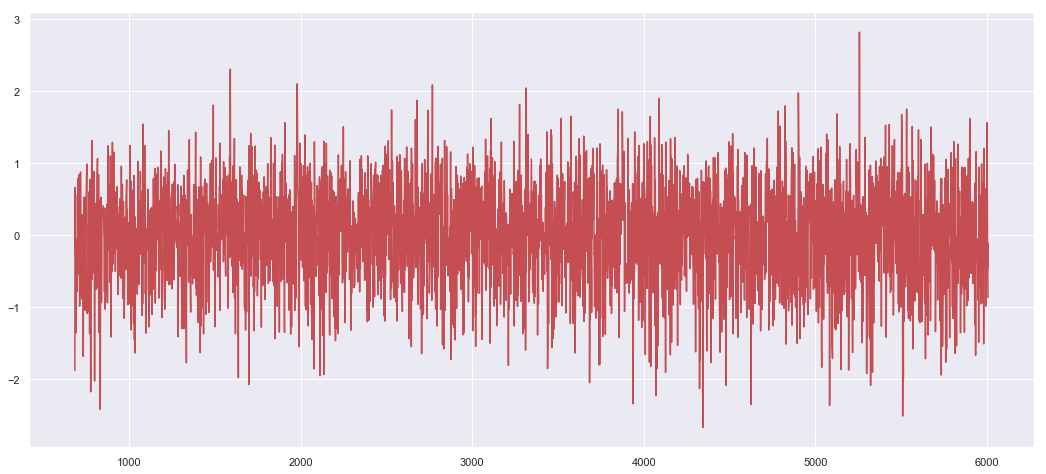

In [234]:
plt.figure(figsize=(18,8))
plt.plot(results.resid, color='r')
#just reviewing residuals - predicted SalesPrice - Actual SalesPrice
plt.show()

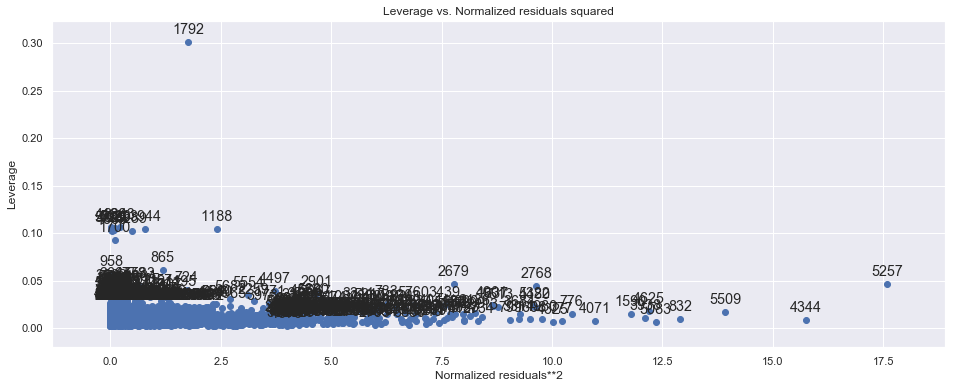

In [235]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(16,6))
fig = plot_leverage_resid2(results, ax = ax)

In [236]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 58.97283483939671),
 ('Two-tail probability', 1.5639095206834194e-13)]

# Heteroskedasticity

In [237]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 365.36350954100175),
 ('p-value', 4.08563361230356e-55),
 ('f-value', 10.548837806150653),
 ('f p-value', 1.877704760317802e-58)]

# Test Model

In [238]:
results.params

Intercept                        -0.331041
Year                              0.150591
Global_Sales                      0.151244
Critic_Count                      0.190408
User_Score                        0.546233
User_Count                        0.036579
g_Fighting                        0.228129
g_Misc                            0.271722
g_Platform                        0.134655
g_Puzzle                          0.515508
g_Racing                          0.167721
g_RolePlaying                     0.189984
g_Shooter                         0.122370
g_Simulation                      0.159117
g_Sports                          0.522256
g_Strategy                        0.300821
d_Activision                      0.159207
d_Capcom                          0.291895
d_Codemasters                     0.365751
d_Eidos_Interactive               0.223340
d_Electronic_Arts                 0.275195
d_Konami_Digital_Entertainment    0.228545
d_LucasArts                       0.284863
d_Sony_Comp

In [239]:
X_test.shape

(1597, 67)

In [241]:
X_new.shape

(3725, 39)

In [243]:
#Need to drop same columns from X_test as X_train

X_test.drop(['d_Nippon_Ichi_Software','Other_Sales','JP_Sales','EU_Sales','g_Adventure',
             'd_Disney_Interactive_Studios','d_Midway_Games','d_Microsoft_Game_Studios',
              'd_D3Publisher','d_Sega','d_Rising_Star_Games','d_Tecmo_Koei','d_Atari',
              'd_Acclaim_Entertainment','d_Empire_Interactive','p_WiiU','d_Bethesda_Softworks',
             'p_PS4','p_PSV','d_Vivendi_Games','p_DS','d_Nintendo','p_PSP',
             'd_Warner_Bros_Interactive_Entertainment','d_Ignition_Entertainment','d_Namco_Bandai_Games',
             'd_Deep_Silver','d_Focus_Home_Interactive','p_PS3'],axis=1, inplace=True)



In [257]:
cols_stand_test = ['Year','Global_Sales','Critic_Count','User_Score','User_Count']

for i in cols_stand_test:
    X_test[i] = standardize(X_test[i])

In [247]:
X_test['c'] = 1

In [259]:
cols_at_end = ['c']
X_t= X_test[[i for i in X_test if i in cols_at_end ]+ [i for i in X_test if i not in cols_at_end]]


predict = np.dot(X_t, results.params )

In [252]:
mu_CS = np.mean(X_new['Critic_Score'])
std_CS = np.std(X_new['Critic_Score'])
print(mu_CS, std_CS)

69.21046979865771 13.582489632298744


In [260]:
d = {'Predicted': predict}
df_NEW = pd.DataFrame(data=d)
Compare = pd.concat((X_test,y_test), axis=1)
Compare['Predicted'] = np.round(np.dot(X_t, results.params),2)
Compare['Predicted'] = Compare['Predicted']*std_CS+mu_CS

Score_R = Compare[['Critic_Score','Predicted']]
Score_R['Percentage'] = round(((Score_R['Predicted'] - Score_R['Critic_Score'])/Score_R['Critic_Score'])*100,2)

Score_R.sort_index(inplace=True)

C:\Users\Tom N\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Tom N\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [261]:
Score_R.head()

,Critic_Score,Predicted,Percentage
688,71.0,74.371816,4.75
689,82.0,85.509457,4.28
690,94.0,85.645282,-8.89
695,78.0,82.521310,5.80
696,82.0,78.854037,-3.84


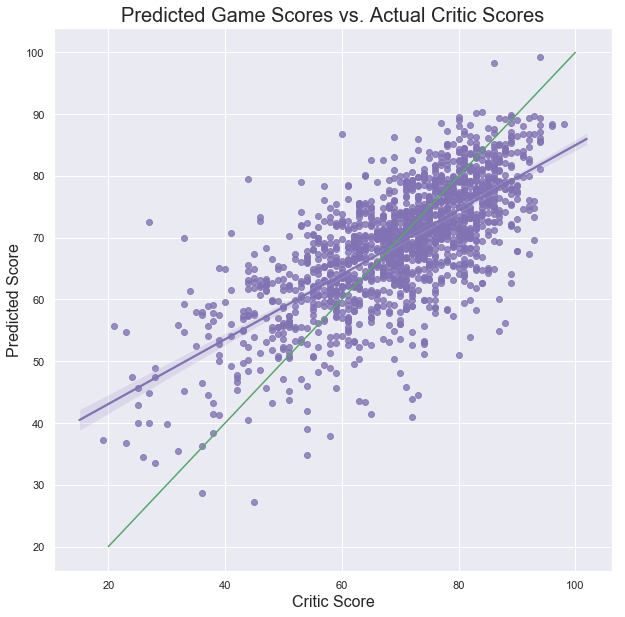

In [417]:
plt.figure(figsize=(10,10))

ax = sns.regplot(x = Score_R['Critic_Score'],y=Score_R['Predicted'], color='m')
x1=[20,100]
y1=[20,100]
ax = sns.lineplot(x1,y1, color='g')
ax.set_xlabel(xlabel='Critic Score', fontsize=16)
ax.set_ylabel(ylabel='Predicted Score', fontsize=16)
ax.set_title(label='Predicted Game Scores vs. Actual Critic Scores', fontsize=20)

plt.show()




# Visualize More

In [328]:
ScoreR2 = Score_R.drop('Critic_Score',axis=1)

In [329]:
df_ult = df.join(ScoreR2, how='outer')

In [331]:
df_ult['Predicted'] = df_ult['Predicted'].apply(lambda x: round(x,2))

In [332]:
df_ult['Year'] = df_ult['Year'].astype(int)

In [333]:
df_ult = df_ult.dropna()
df_ult.head()

,Name,Platform,Year,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Predicted,Percentage
688,Guild Wars 2,PC,2012,Action,NCSoft,0.96,1.07,0.00,0.27,2.31,90.0,69.0,79.0,2954.0,T,74.37,4.75
690,Paper Mario: Sticker Star,3DS,2012,Role-Playing,Nintendo,1.12,0.41,0.64,0.14,2.30,75.0,69.0,56.0,382.0,E,85.65,-8.89
695,LEGO Star Wars: The Complete Saga,PS3,2007,Action,LucasArts,1.02,0.90,0.00,0.36,2.29,80.0,18.0,67.0,87.0,E10+,82.52,5.80
696,Need for Speed Underground 2,XB,2004,Racing,Electronic Arts,1.38,0.80,0.00,0.10,2.28,77.0,35.0,87.0,27.0,E,78.85,-3.84
700,LEGO Harry Potter: Years 1-4,DS,2010,Action,Warner Bros. Interactive Entertainment,1.07,0.99,0.00,0.22,2.28,72.0,7.0,72.0,6.0,E10+,82.52,23.17


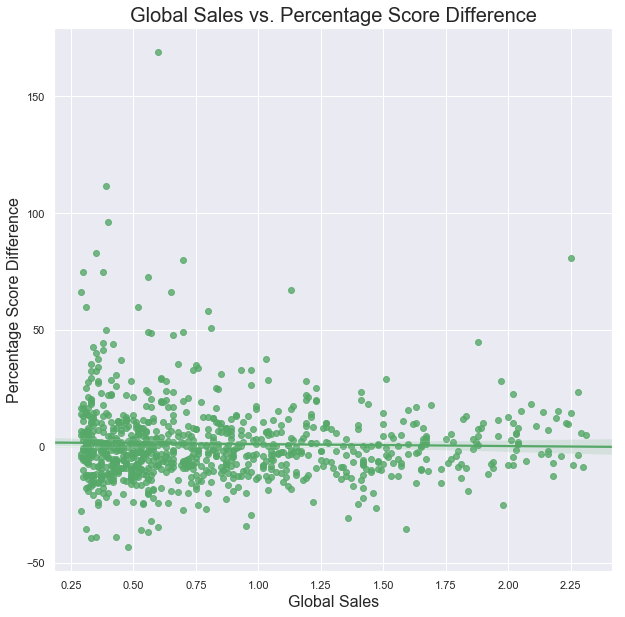

In [342]:
plt.figure(figsize=(10,10))

ax = sns.regplot(x = df_ult['Global_Sales'],y=df_ult['Percentage'], color='g')

ax.set_xlabel(xlabel='Global Sales', fontsize=16)
ax.set_ylabel(ylabel='Percentage Score Difference', fontsize=16)
ax.set_title(label='Global Sales vs. Percentage Score Difference', fontsize=20)

plt.show()


In [345]:
GenreGT = df_ult.groupby(['Genre']).mean()

In [357]:
GenreGT['Perc_of_Avg'] = round((GenreGT['Predicted']-GenreGT['Critic_Score'])/GenreGT['Critic_Score']*100,2)

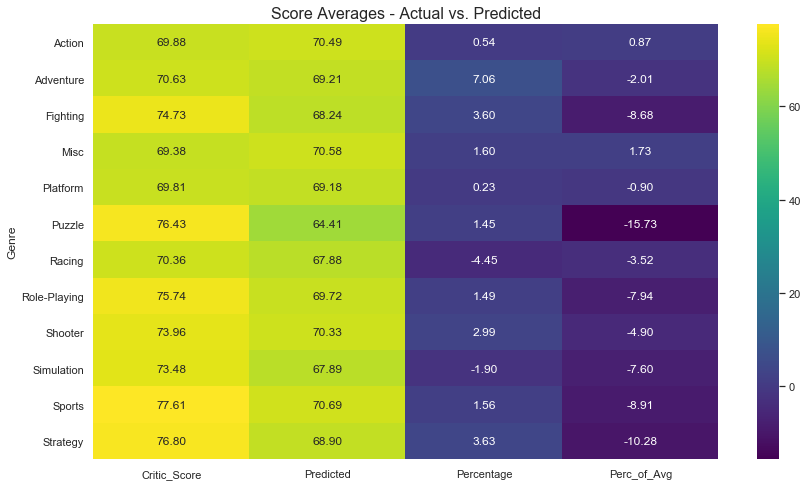

In [364]:
plt.figure(figsize=(14,8))

ax1 = sns.heatmap(GenreGT.loc['Action':'Strategy',['Critic_Score','Predicted','Percentage','Perc_of_Avg']], annot=True, fmt = '.2f', cmap='viridis')
ax1.set_title("Score Averages - Actual vs. Predicted", fontsize=16)


plt.show()

In [359]:
RatingT = df_ult.groupby(['Rating']).mean()

In [361]:
RatingT ['Perc_of_Avg'] = round((RatingT['Predicted']-RatingT['Critic_Score'])/RatingT['Critic_Score']*100,2)

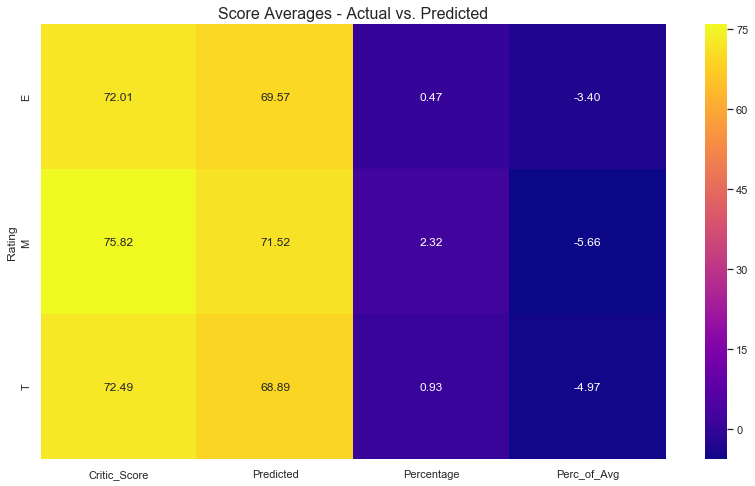

In [362]:
plt.figure(figsize=(14,8))

ax1 = sns.heatmap(RatingT.loc[:,['Critic_Score','Predicted','Percentage','Perc_of_Avg']], annot=True, fmt = '.2f', cmap='plasma')
ax1.set_title("Score Averages - Actual vs. Predicted", fontsize=16)


plt.show()

In [334]:
df_ult['Rating'] = df_ult['Rating'].replace('E10+','E')
df_ult['Rating'] = df_ult['Rating'].replace('K-A','E')
df_ult['Rating'] = df_ult['Rating'].replace('AO','M')
df_ult['Rating'] = df_ult['Rating'].replace('RP','E')
df_ult['Rating'] = df_ult['Rating'].replace('EC','E')
df_ult['Year'] = df_ult['Year'].astype(int)

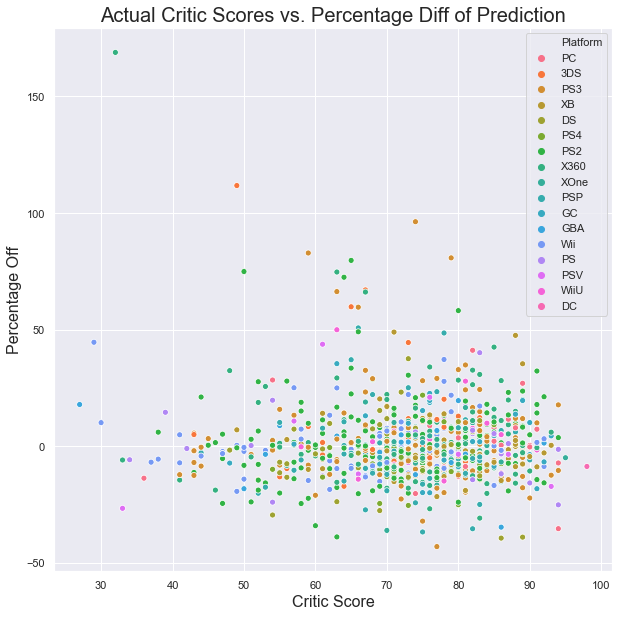

In [363]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x = 'Critic_Score',y='Percentage', data=df_ult,hue='Platform')

ax.set_xlabel(xlabel='Critic Score', fontsize=16)
ax.set_ylabel(ylabel='Percentage Off', fontsize=16)
ax.set_title(label='Actual Critic Scores vs. Percentage Diff of Prediction', fontsize=20)

plt.show()




In [397]:
df_c = df.copy()
df_c = df_c.dropna()
df_c['c']=1
df_c

,Name,Platform,Year,Genre,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,c
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,E,1
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,E,1
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,E,1
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,85.0,431.0,E,1
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,66.0,129.0,E,1
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,84.0,594.0,E,1
11,Mario Kart DS,DS,2005,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,86.0,464.0,E,1
13,Wii Fit,Wii,2007,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,77.0,146.0,E,1
14,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,63.0,106.0,E,1
15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.01,8.49,2.53,1.77,21.79,80.0,33.0,74.0,52.0,E,1


In [398]:
DevMean = df_c.groupby(['Developer']).sum()
DevMean = pd.DataFrame(DevMean.sort_values(by='Global_Sales', ascending=False))[0:10]

In [399]:
DevMean.columns

Index(['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'c'],
      dtype='object')

In [404]:
DevMean['Critic_Score_Avg'] = round(DevMean['Critic_Score']/DevMean['c'])
DevMean['User_Score_Avg'] = round(DevMean['User_Score']/DevMean['c'])
DevMean['Sales_Avg'] = round(DevMean['Global_Sales']/DevMean['c'],2)

In [406]:
DevMean.sort_values(by='Sales_Avg', ascending=False, inplace=True)

In [412]:
DevMean

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,c,Critic_Score_Avg,User_Score_Avg,Sales_Avg
Developer,,,,,,,,,,,,,,
Nintendo,584301,371.36,242.11,173.80,62.41,849.49,22185.0,12702.0,23055.0,58039.0,291,76.0,79.0,2.92
Microsoft Game Studios,282971,138.90,58.16,2.83,16.61,216.49,10828.0,7352.0,10473.0,55402.0,141,77.0,74.0,1.54
Take-Two Interactive,548306,187.82,106.24,5.56,50.55,350.17,20729.0,9369.0,19556.0,108092.0,273,76.0,72.0,1.28
Sony Computer Entertainment,634007,176.87,117.53,39.92,53.78,388.10,23681.0,12432.0,24121.0,88064.0,316,75.0,76.0,1.23
Activision,987649,306.82,166.54,5.31,57.01,535.74,34713.0,14426.0,33876.0,117380.0,492,71.0,69.0,1.09
Electronic Arts,1894626,465.45,289.24,10.85,102.92,868.55,70753.0,26949.0,67382.0,165773.0,944,75.0,71.0,0.92
Ubisoft,996012,174.92,121.28,6.41,37.59,340.23,34366.0,13478.0,35027.0,83988.0,496,69.0,71.0,0.69
Konami Digital Entertainment,489711,51.23,45.21,21.76,19.59,137.87,17110.0,6208.0,17822.0,31302.0,244,70.0,73.0,0.57
THQ,616003,93.97,47.25,2.51,19.11,162.87,21092.0,7811.0,22029.0,27985.0,307,69.0,72.0,0.53


In [424]:
DevMean = DevMean[["Critic_Score_Avg","User_Score_Avg"]]

In [425]:
DevMean

,Critic_Score_Avg,User_Score_Avg
Developer,,
Nintendo,76.0,79.0
Microsoft Game Studios,77.0,74.0
Take-Two Interactive,76.0,72.0
Sony Computer Entertainment,75.0,76.0
Activision,71.0,69.0
Electronic Arts,75.0,71.0
Ubisoft,69.0,71.0
Konami Digital Entertainment,70.0,73.0
THQ,69.0,72.0


In [428]:
DevMean = pd.melt(DevMean, id_vars=DevMean.index, var_name="Critic_Score_Avg", value_name="Score")

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Activision', 'Electronic Arts', 'Konami Digital Entertainment', 'Microsoft Game Studios', 'Nintendo', 'Sega', 'Sony Computer Entertainment', 'THQ', 'Take-Two Interactive', 'Ubisoft']"

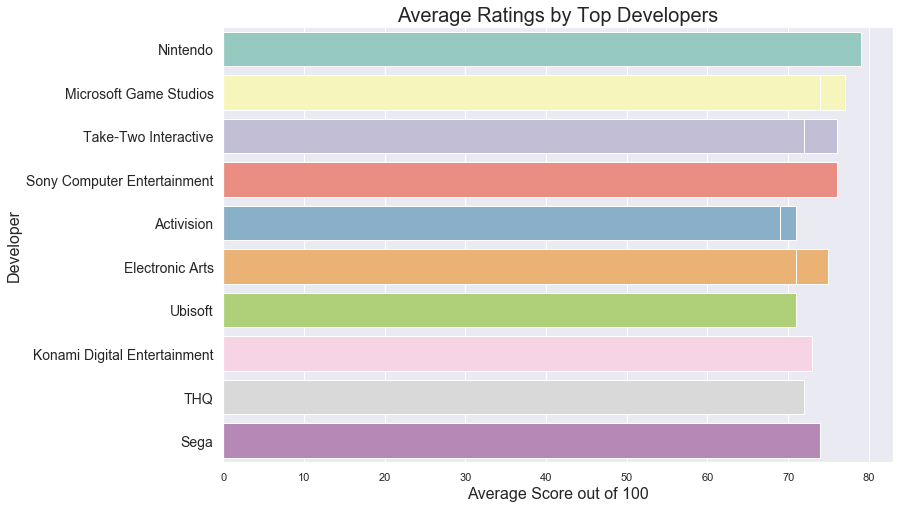

In [421]:
publishers = DevMean.index

colors = sns.color_palette("Set3", len(DevMean))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Critic_Score_Avg', data=DevMean, orient='h', palette=colors)

#plt.bar(publishers, DevMean['Critic_Score_Avg'], label='Alone')
#plt.bar(publishers, DevMean['User_Score_Avg'], label='With Himself')

ax = sns.barplot(y = publishers , x = 'User_Score_Avg', data=DevMean, orient='h', palette=colors)


ax.set_xlabel(xlabel='Average Score out of 100', fontsize=16)
ax.set_ylabel(ylabel='Developer', fontsize=16)
ax.set_title(label='Average Ratings by Top Developers', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();



In [444]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

Object `WordCloud` not found.


In [457]:
text = df.Name
text

0                                               Wii Sports
1                                        Super Mario Bros.
2                                           Mario Kart Wii
3                                        Wii Sports Resort
4                                 Pokemon Red/Pokemon Blue
5                                                   Tetris
6                                    New Super Mario Bros.
7                                                 Wii Play
8                                New Super Mario Bros. Wii
9                                                Duck Hunt
10                                              Nintendogs
11                                           Mario Kart DS
12                             Pokemon Gold/Pokemon Silver
13                                                 Wii Fit
14                                      Kinect Adventures!
15                                            Wii Fit Plus
16                                      Grand Theft Auto

In [466]:
l = ''

for i, item in text.iteritems():
    l += (' ' + item)

In [484]:
stopwords = ["II",'The','the','of','and','of the','Game','III']

In [485]:
wordcloud1 = WordCloud(stopwords=stopwords,max_font_size=70,max_words=100,background_color="white").generate(l)

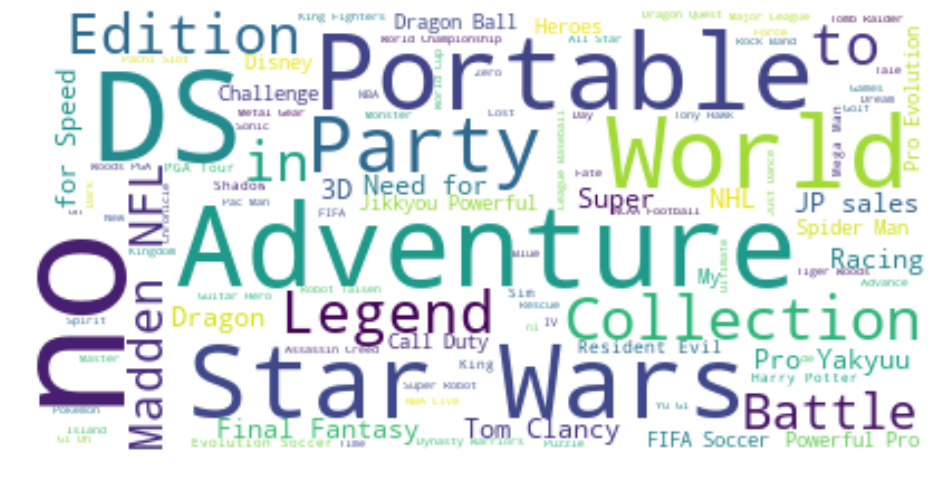

In [486]:
plt.figure(figsize=(16,10))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.show()

In [491]:
from statsmodels.multivariate.pca import PCA

In [625]:
X_new.shape

(3725, 39)

In [679]:
X_new.columns

Index(['Year', 'Global_Sales', 'Critic_Count', 'User_Score', 'User_Count',
       'g_Fighting', 'g_Misc', 'g_Platform', 'g_Puzzle', 'g_Racing',
       'g_RolePlaying', 'g_Shooter', 'g_Simulation', 'g_Sports', 'g_Strategy',
       'd_Activision', 'd_Capcom', 'd_Codemasters', 'd_Eidos_Interactive',
       'd_Electronic_Arts', 'd_Konami_Digital_Entertainment', 'd_LucasArts',
       'd_Sony_Computer_Entertainment', 'd_Square_Enix', 'd_THQ',
       'd_TakeTwo_Interactive', 'd_Ubisoft', 'p_DC', 'p_GBA', 'p_GC', 'p_PC',
       'p_PS', 'p_Wii', 'p_X360', 'p_XB', 'p_XOne', 'r_M', 'r_T',
       'Critic_Score'],
      dtype='object')

In [605]:
X_npca = X_new.copy()
pc = PCA(np.array(X_npca), ncomp=2)
pc.factors

array([[-0.01639955, -0.04093495],
       [ 0.03731261,  0.01746554],
       [ 0.00323478,  0.0335183 ],
       ...,
       [-0.01434533,  0.00051128],
       [-0.00644049,  0.00021925],
       [ 0.01546098, -0.00205745]])

In [644]:
X_new.columns

Index(['Year', 'Global_Sales', 'Critic_Count', 'User_Score', 'User_Count',
       'g_Fighting', 'g_Misc', 'g_Platform', 'g_Puzzle', 'g_Racing',
       'g_RolePlaying', 'g_Shooter', 'g_Simulation', 'g_Sports', 'g_Strategy',
       'd_Activision', 'd_Capcom', 'd_Codemasters', 'd_Eidos_Interactive',
       'd_Electronic_Arts', 'd_Konami_Digital_Entertainment', 'd_LucasArts',
       'd_Sony_Computer_Entertainment', 'd_Square_Enix', 'd_THQ',
       'd_TakeTwo_Interactive', 'd_Ubisoft', 'p_DC', 'p_GBA', 'p_GC', 'p_PC',
       'p_PS', 'p_Wii', 'p_X360', 'p_XB', 'p_XOne', 'r_M', 'r_T',
       'Critic_Score'],
      dtype='object')

In [595]:
y_pca = y_train.copy()

In [596]:
y_pca.head()

4507    72.0
3410    58.0
5326    73.0
1485    81.0
5503    79.0
Name: Critic_Score, dtype: float64

(3725, 39)

In [606]:
y_pca = y_train.copy()
y_pca.sort_index(inplace=True)
y_pca.reset_index(drop=True, inplace=True)

In [607]:
X_npca = pd.DataFrame(pc.factors)
X_npca['Y'] = y_pca

X_npca.head()

,0,1,Y
0,-0.016400,-0.040935,20.0
1,0.037313,0.017466,95.0
2,0.003235,0.033518,87.0
3,0.013179,0.005158,74.0
4,-0.013021,0.022205,64.0


In [624]:
X_test.shape

(1597, 39)

In [621]:
from statsmodels.regression.linear_model import OLS
results_pca = OLS(standardize(X_npca['CS']), Xs_pca).fit()

results_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CS   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     4024.
Date:                Fri, 21 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:21:36   Log-Likelihood:                -3141.2
No. Observations:                3725   AIC:                             6286.
Df Residuals:                    3723   BIC:                             6299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
F1            27.6446      0.562     49.148      0.000      26.542      28.747
F2            42.2125      0.562     75.048      0.000      41.110      43.315
==============================================================================
Omnibus:                       34.785   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.055
Skew:                          -0.056   Prob(JB):                     1.83e-12
Kurtosis:                       3.580   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [666]:
'''
X_npca.columns = ['F1','F2','CS']

Xs_pca = X_npca[[i for i in X_npca.columns if i!= 'CS']]

results_pca = smf.ols(f"standardize(CS) ~ {' + '.join(Xs_pca.columns)}" , data=X_npca).fit()
results_pca.summary()'''

'\nX_npca.columns = [\'F1\',\'F2\',\'CS\']\n\nXs_pca = X_npca[[i for i in X_npca.columns if i!= \'CS\']]\n\nresults_pca = smf.ols(f"standardize(CS) ~ {\' + \'.join(Xs_pca.columns)}" , data=X_npca).fit()\nresults_pca.summary()'

# Check Predictions

In [622]:
results_pca.params

F1    27.644626
F2    42.212506
dtype: float64

In [639]:
X_test.shape

(1597, 39)

In [641]:
pc.coeff  #try pca.fit(x).component

array([[ 29.80284539,  21.68107404,  41.94359426,  11.69887451,
         40.24401642,  -4.97542459,  -5.59362556,  -9.32711161,
         -1.8241244 ,  -8.56838518,   9.19736488,  19.6491083 ,
         -3.03203351,  -9.60486038,   4.01988129,  -3.57908178,
          2.23293811,   2.17466861,  -1.6761009 ,  -1.20105394,
         -1.21632576,  -0.53616926,  -0.91941316,  12.22576708,
         -6.31176081,  10.62939322,   2.02958691,  -2.46945732,
        -11.66260579, -11.48975157,  27.34208762, -10.51898167,
         -9.79856204,  13.35668853,  -5.0533681 ,  10.2261178 ,
         34.20993633,  -8.1456901 ,  27.64833743],
       [-32.65179312,  19.38411165,   8.30150885,  44.6289769 ,
          0.63857314,   0.68073686, -11.74011567,   4.56266283,
          1.069553  ,   1.02148753,   4.66412832,  -7.26474032,
          1.76394309,  17.29885915,  -0.36894416,  -4.04636883,
          1.80699309,  -5.71014095,  -1.68715288,  17.66938283,
         -0.22816203,  -1.88467905,   9.19841227,  -0

In [667]:
X_test.head(1)

,Year,Global_Sales,Critic_Count,User_Score,User_Count,g_Fighting,g_Misc,g_Platform,g_Puzzle,g_Racing,...,p_GC,p_PC,p_PS,p_Wii,p_X360,p_XB,p_XOne,r_M,r_T,c
4592,0.847855,-0.770647,0.346215,-0.914655,0.464709,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [670]:
X_testn = X_test.copy()
X_testn.drop(['c'],axis=1,inplace=True)
X_testn['Critic_Score'] = standardize(y_test)

In [671]:
X_testn.head()

,Year,Global_Sales,Critic_Count,User_Score,User_Count,g_Fighting,g_Misc,g_Platform,g_Puzzle,g_Racing,...,p_GC,p_PC,p_PS,p_Wii,p_X360,p_XB,p_XOne,r_M,r_T,Critic_Score
4592,0.847855,-0.770647,0.346215,-0.914655,0.464709,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0.318317
3451,0.601758,-0.417353,-0.579634,1.171345,-0.231207,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,-0.361601
2808,-0.136532,-0.114530,0.924870,0.955552,5.912343,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1.980336
1374,-1.120919,1.248173,-1.042558,1.027483,-0.195299,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0.091677
5637,-1.367016,-0.947294,-0.463903,0.595897,-0.236336,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-0.512693


In [672]:
dot = np.dot(X_testn, pc.coeff.T)

In [673]:
dot2 = np.dot(dot, results_pca.params)

In [674]:
dot2

array([  -349.91911251,  -1097.68572582,  16800.32744104, ...,
        -2087.30443852,   6311.99395999, -12036.84915368])

In [681]:
dot2*std_CS1/mu_CS1

array([  -66.35090409,  -208.14078944,  3185.64169528, ...,
        -395.79014596,  1196.86662119, -2282.40126142])

In [665]:
mu_CS1 = np.mean(X_testn['Critic_Score'])
std_CS1 = np.std(X_testn['Critic_Score'])
print(mu_CS1, std_CS1)

69.7864746399499 13.232760144697812
